In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from keras.models import Sequential,Model
from keras.layers import LSTM,Input,Dropout,Dense
from keras.layers import TimeDistributed,RepeatVector

Using TensorFlow backend.


Using 60 years daily historical data from general electric, taken from yahoo finance.

https://finance.yahoo.com/quote/GE/history?p=GE

In [3]:
data=pd.read_csv('GE_60.csv')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.751202,0.763722,0.743690,0.748698,0.124899,2156500
1,1962-01-03,0.744942,0.744942,0.738682,0.741186,0.123646,1477600
2,1962-01-04,0.741186,0.747446,0.726162,0.732422,0.122184,1837000
3,1962-01-05,0.732422,0.733674,0.701122,0.713642,0.119051,2725600
4,1962-01-08,0.713642,0.713642,0.691106,0.712390,0.118842,3095000
...,...,...,...,...,...,...,...
14848,2020-12-24,10.850000,10.850000,10.620000,10.650000,10.650000,30049700
14849,2020-12-28,10.700000,10.780000,10.580000,10.640000,10.640000,53796700
14850,2020-12-29,10.660000,10.770000,10.540000,10.560000,10.560000,53035900
14851,2020-12-30,10.580000,10.850000,10.550000,10.710000,10.710000,50621000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14853 entries, 0 to 14852
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14853 non-null  object 
 1   Open       14853 non-null  float64
 2   High       14853 non-null  float64
 3   Low        14853 non-null  float64
 4   Close      14853 non-null  float64
 5   Adj Close  14853 non-null  float64
 6   Volume     14853 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 812.4+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,1.485300e+04
mean,12.152237,12.280211,12.016574,12.150452,7.823668,2.436369e+07
std,13.286002,13.431398,13.133813,13.286684,8.935142,3.390296e+07
min,0.555889,0.564653,0.543369,0.555889,0.094056,0.000000e+00
25%,1.104267,1.114283,1.096755,1.104267,0.274211,4.992000e+06
50%,5.719151,5.779247,5.669071,5.719151,2.548532,1.432200e+07
75%,23.076923,23.326923,22.798077,23.076923,15.468337,2.837070e+07
max,57.271633,58.173077,57.151443,57.692307,31.604841,7.830205e+08


In [7]:
df=data[['Date','Close']]

In [8]:
df

,Date,Close
0,1962-01-02,0.748698
1,1962-01-03,0.741186
2,1962-01-04,0.732422
3,1962-01-05,0.713642
4,1962-01-08,0.712390
...,...,...
14848,2020-12-24,10.650000
14849,2020-12-28,10.640000
14850,2020-12-29,10.560000
14851,2020-12-30,10.710000


In [9]:
df['Date']=pd.to_datetime(df['Date'])

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14853 entries, 0 to 14852
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    14853 non-null  datetime64[ns]
 1   Close   14853 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 232.2 KB


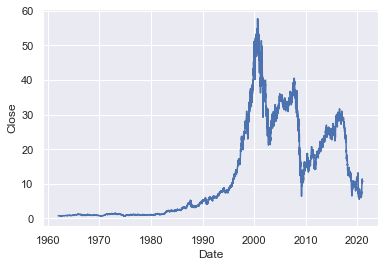

In [11]:
sns.lineplot(x=df['Date'],y=df['Close'])

In [12]:
print(f'Start Date ' , df['Date'].min())

Start Date  1962-01-02 00:00:00


In [13]:
print(f'End Date ' , df['Date'].max())

End Date  2020-12-31 00:00:00


# Time based train test split

In [14]:
train,test=df.loc[df['Date'] <= '2004-12-31'] , df.loc[df['Date'] > '2004-12-31']

In [15]:
sc=StandardScaler()

In [16]:
train['Close']=sc.fit_transform(train['Close'].values.reshape(-1,1))

d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:

test['Close']=sc.transform(test['Close'].values.reshape(-1,1))


d:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
train.head()

,Date,Close
0,1962-01-02,-0.603543
1,1962-01-03,-0.604133
2,1962-01-04,-0.604821
3,1962-01-05,-0.606295
4,1962-01-08,-0.606394


In [19]:
test.head()

,Date,Close
10825,2005-01-03,2.099706
10826,2005-01-04,2.066492
10827,2005-01-05,2.049885
10828,2005-01-06,2.071776
10829,2005-01-07,2.055169


In [20]:
sequence_length=30

In [21]:
def convert_to_sequences(x,y,sequence_length=1):
    x_val=[]
    y_val=[]
    
    for i in range(len(x) - sequence_length):
        
        x_val.append(x.iloc[i : (i + sequence_length)].values)
        y_val.append(y.iloc[i + sequence_length])
        
    return np.array(x_val),np.array(y_val)

the above function takes first sequence_length rows as x and the next sequenct_length+1 th number as y.

In [22]:
train_x,train_y=convert_to_sequences(train[['Close']],train['Close'],sequence_length)

In [23]:
test_x,test_y=convert_to_sequences(test[['Close']],test['Close'],sequence_length)

In [24]:
print(train_x.shape,train_y.shape)

(10795, 30, 1) (10795,)


In [25]:
print(test_x.shape,test_y.shape)

(3998, 30, 1) (3998,)


In [26]:
train_x[0]

array([[-0.6035432 ],
       [-0.60413293],
       [-0.60482095],
       [-0.60629528],
       [-0.60639357],
       [-0.6060987 ],
       [-0.60580384],
       [-0.60570555],
       [-0.60649186],
       [-0.60590213],
       [-0.60541068],
       [-0.60668844],
       [-0.6060987 ],
       [-0.60560726],
       [-0.60541068],
       [-0.60649186],
       [-0.60541068],
       [-0.60600042],
       [-0.60619699],
       [-0.6060987 ],
       [-0.60511582],
       [-0.60334662],
       [-0.60373978],
       [-0.60344491],
       [-0.60452609],
       [-0.60393636],
       [-0.60334662],
       [-0.60295347],
       [-0.60324834],
       [-0.60324834]])

In [27]:
train_y[0]

-0.6025603162737402

In [28]:
def define_lstm_model(train_x):
    model = Sequential()
    model.add(LSTM(128, input_shape=(train_x.shape[1], train_x.shape[2])))
    model.add(Dropout(rate=0.2))
    #https://keras.io/api/layers/reshaping_layers/repeat_vector/
    model.add(RepeatVector(train_x.shape[1]))

    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(TimeDistributed(Dense(train_x.shape[2])))
    model.compile(optimizer='adam', loss='mae')
    model.summary()
    return model

In [29]:
model=define_lstm_model(train_x)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

In [30]:
history = model.fit(train_x, train_y, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
304/304 [==============================] - 3s 9ms/step - loss: 0.0605 - val_loss: 0.1524
Epoch 2/50
304/304 [==============================] - 2s 7ms/step - loss: 0.0364 - val_loss: 0.0808
Epoch 3/50
304/304 [==============================] - 2s 7ms/step - loss: 0.0325 - val_loss: 0.0590
Epoch 4/50
304/304 [==============================] - 2s 7ms/step - loss: 0.0306 - val_loss: 0.0497
Epoch 5/50
304/304 [==============================] - 2s 7ms/step - loss: 0.0290 - val_loss: 0.0784
Epoch 6/50
304/304 [==============================] - 2s 8ms/step - loss: 0.0275 - val_loss: 0.1000
Epoch 7/50
304/304 [==============================] - 2s 8ms/step - loss: 0.0276 - val_loss: 0.0498
Epoch 8/50
304/304 [==============================] - 2s 7ms/step - loss: 0.0266 - val_loss: 0.0728
Epoch 9/50
304/304 [==============================] - 2s 8ms/step - loss: 0.0255 - val_loss: 0.1012
Epoch 10/50
304/304 [==============================] - 2s 8ms/step - loss: 0.0267 - val_loss: 0.0802

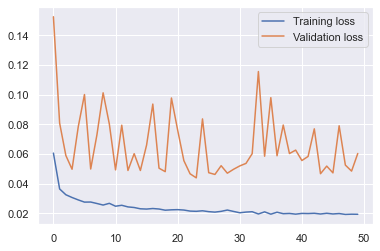

In [31]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

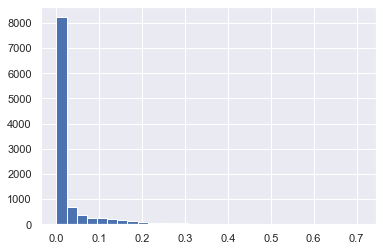

In [32]:
train_preds = model.predict(train_x)
mae_train = np.mean(np.abs(train_preds - train_x), axis=1)
plt.hist(mae_train, bins=30)
max_mae_train = 0.36 

(array([217., 815., 758., 569., 389., 321., 231., 199., 118., 101.,  60.,
         38.,  35.,  39.,  29.,  17.,  12.,  15.,   6.,   6.,   8.,   6.,
          0.,   2.,   4.,   0.,   0.,   1.,   1.,   1.]),
 array([0.00536975, 0.02132957, 0.03728938, 0.0532492 , 0.06920901,
        0.08516882, 0.10112864, 0.11708845, 0.13304827, 0.14900808,
        0.1649679 , 0.18092771, 0.19688753, 0.21284734, 0.22880715,
        0.24476697, 0.26072678, 0.2766866 , 0.29264641, 0.30860623,
        0.32456604, 0.34052586, 0.35648567, 0.37244549, 0.3884053 ,
        0.40436511, 0.42032493, 0.43628474, 0.45224456, 0.46820437,
        0.48416419]),
 <a list of 30 Patch objects>)

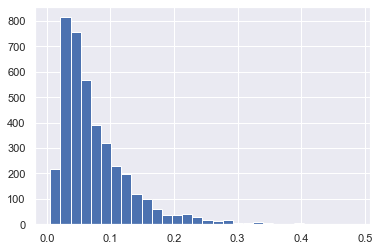

In [33]:

testPredict = model.predict(test_x)
testMAE = np.mean(np.abs(testPredict - test_x), axis=1)
plt.hist(testMAE, bins=30)

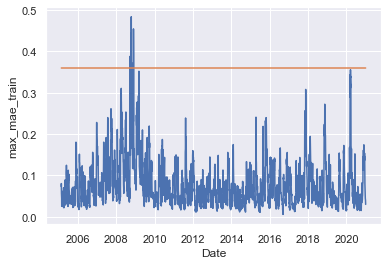

In [34]:

#Capture all details in a DataFrame for easy plotting
anomaly_df = pd.DataFrame(test[sequence_length:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_mae_train'] = max_mae_train
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_mae_train']
anomaly_df['Close'] = test[sequence_length:]['Close']

#Plot testMAE vs max_trainMAE
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_mae_train'])


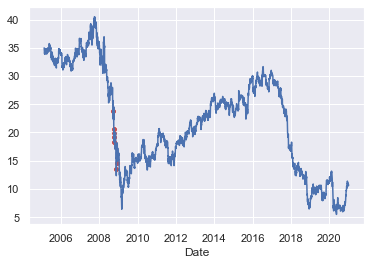

In [35]:

anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

#Plot anomalies
sns.lineplot(x=anomaly_df['Date'], y=sc.inverse_transform(anomaly_df['Close']))
sns.scatterplot(x=anomalies['Date'], y=sc.inverse_transform(anomalies['Close']), color='r')